# HW1 : Regression, Cross-Validation, and  Regularization

In [104]:
import os
import numpy as np
import warnings

import sklearn.preprocessing
import sklearn.pipeline
import sklearn.linear_model
import sklearn.neighbors
import sklearn.model_selection

from performance_metrics import calc_mean_squared_error


In [105]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

# Set random seed to make all computations reproducible

In [106]:
SEED = 12345

# Load the dataset

Predefined 'x' and 'y' arrays for train/valid/test

In [107]:
DATA_DIR = 'data_auto/'

In [108]:
x_tr_MF = np.loadtxt(os.path.join(DATA_DIR, 'x_train.csv'), delimiter=',', skiprows=1)
x_va_NF = np.loadtxt(os.path.join(DATA_DIR, 'x_valid.csv'), delimiter=',', skiprows=1)
x_te_PF = np.loadtxt(os.path.join(DATA_DIR, 'x_test.csv'), delimiter=',', skiprows=1)

In [109]:
y_tr_M = np.loadtxt(os.path.join(DATA_DIR, 'y_train.csv'), delimiter=',', skiprows=1)
y_va_N = np.loadtxt(os.path.join(DATA_DIR, 'y_valid.csv'), delimiter=',', skiprows=1)
y_te_P = np.loadtxt(os.path.join(DATA_DIR, 'y_test.csv'), delimiter=',', skiprows=1)

In [110]:
print(x_tr_MF)

[[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 [1.050e+02 3.897e+03 6.000e+00 2.500e+02]
 [1.930e+02 4.732e+03 8.000e+00 3.040e+02]
 [1.100e+02 3.039e+03 6.000e+00 2.310e+02]
 [1.500e+02 4.096e+03 8.000e+00 3.180e+02]
 [8.600e+01 2.464e+03 4.000e+00 1.070e+02]
 [6.500e+01 2.380e+03 4.000e+00 9.800e+01]
 [8.400e+01 2.490e+03 4.000e+00 1.350e+02]
 [8.400e+01 2.385e+03 4.000e+00 1.350e+02]
 [9.800e+01 3.525e+03 6.000e+00 2.500e+02]
 [9.000e+01 2.123e+03 4.000e+00 1.160e+02]
 [9.000e+01 2.430e+03 4.000e+00 1.070e+02]
 [1.300e+02 4.295e+03 8.000e+00 3.020e+02]
 [6.700e+01 2.950e+03 5.000e+00 1.210e+02]
 [6.700e+01 1.850e+03 4.000e+00 9.100e+01]
 [7.200e+01 2.290e+03 4.000e+00 1.070e+02]
 [9.000e+01 3.420e+03 8.000e+00 2.600e+02]
 [1.500e+02 3.755e+03 8.000e+00 3.180e+02]
 [7.100e+01 3.190e+03 4.000e+00 1.410e+02]
 [6.800e+01 2.155e+03 4.000e+00 9.800e+01]
 [2.150e+02 4.312e+03 8.000e+00 4.400e+02]
 [1.070e+02

# Load completed code

In [111]:
from cross_validation import train_models_and_calc_scores_for_n_fold_cv
from performance_metrics import calc_mean_squared_error

# Define useful plotting functions

In [112]:
def plot_train_and_valid_error_vs_degree(
        degree_list, err_tr_list=None, err_va_list=None):
    ''' Plot provided errors versus degrees on a new figure
    '''
    if err_va_list is not None:
        plt.plot(degree_list, err_va_list, 'rs-', label='valid');
    if err_tr_list is not None:
        plt.plot(degree_list, err_tr_list, 'bd:', label='train');
    plt.ylim([0, 74]); # Do NOT change this! Helps all reports look the same.
    plt.legend(loc='upper right'); # Always include a legend

# Define methods for building pipelines

Remember, we discussed pipelines in the lab from day04 on "Feature Engineering"

In [114]:
def make_poly_linear_regr_pipeline(degree=1):
    pipeline = sklearn.pipeline.Pipeline(
        steps=[
         ('rescaler', sklearn.preprocessing.MinMaxScaler()),
         ('poly_transformer', sklearn.preprocessing.PolynomialFeatures(degree=degree, include_bias=False)),
         ('linear_regr', sklearn.linear_model.LinearRegression()),
        ])

    # Return the constructed pipeline
    # We can treat it as if it has a 'regression' API
    # e.g. a fit and a predict method
    return pipeline

In [115]:
def make_poly_ridge_regr_pipeline(degree=1, alpha=1.0):
    pipeline = sklearn.pipeline.Pipeline(
        steps=[
         ('rescaler', sklearn.preprocessing.MinMaxScaler()),
         ('poly_transformer', sklearn.preprocessing.PolynomialFeatures(degree=degree, include_bias=False)),
         ('ridge_regr', sklearn.linear_model.Ridge(alpha=alpha)),
        ])
    
    # Return the constructed pipeline
    # We can treat it as if it has a 'regression' API
    # e.g. a fit and a predict method
    return pipeline

# Problem 1: Polynomial Degree Selection on Fixed Validation Set

In [116]:
degree_list = [1, 2, 3, 4, 5, 6, 7]
fv_err_tr_list = []
fv_err_va_list = []

pipeline_list = []
for degree in degree_list:

    # TODO create a pipeline using features with current degree value
    pipeline = make_poly_linear_regr_pipeline(degree)

    # TODO train this pipeline on provided training data
    pipeline.fit(x_tr_MF, y_tr_M)
    
    # Compute training error
    yhat_tr_M = pipeline.predict(x_tr_MF)  # TODO fixme
    err_tr = calc_mean_squared_error(y_tr_M, yhat_tr_M) # TODO fixme
    
    # Compute validation error
    yhat_va_N = pipeline.predict(x_va_NF)  # TODO fixme
    err_va = calc_mean_squared_error(y_va_N, yhat_va_N) # TODO fixme

    fv_err_tr_list.append(err_tr)
    fv_err_va_list.append(err_va)
    pipeline_list.append(pipeline)

### Figure 1: Error vs degree

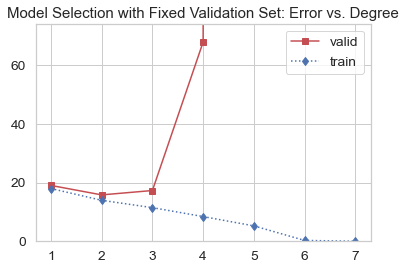

In [117]:
plot_train_and_valid_error_vs_degree(degree_list, fv_err_tr_list, fv_err_va_list);
plt.title('Model Selection with Fixed Validation Set: Error vs. Degree');
plt.savefig('figure1-err_vs_degree-fv.png')

### Prediction 1: Score on the test set using the chosen model

In [118]:
# TODO compute score on test set for later
# The choosen model is the quadratic model, which corresponds to pipeline_list[1]
from tabulate import tabulate
table = np.transpose(np.vstack((degree_list, fv_err_tr_list, fv_err_va_list)))
table = np.around(table, 3)
print(tabulate(table, headers=['Degree', 'Training Error', 'Testing Error']))
#print(tabulate(np.vstack((degree_list, fv_err_tr_list, fv_err_va_list)), headers=['Degree', 'Training Error', 'Testing Error'])))

#print("fv_err_tr_list", fv_err_tr_list)

yhat_te_P = pipeline.predict(x_te_PF)
err_te = calc_mean_squared_error(y_te_P, yhat_te_P)

print("y_te_P.shape", y_te_P.shape)
print("yhat_te_P.shape", yhat_te_P.shape)

print(err_te)

  Degree    Training Error    Testing Error
--------  ----------------  ---------------
       1            17.955     19.013
       2            13.948     15.793
       3            11.453     17.283
       4             8.413     67.82
       5             5.247      2.44771e+19
       6             0.3        2.00636e+18
       7             0.014      1.42945e+16
y_te_P.shape (100,)
yhat_te_P.shape (100,)
30911680085159.254


In [119]:
def pretty_print_weights(pipeline):
    feature_names = pipeline.named_steps['poly_transformer'].get_feature_names(['horsepower', 'weight', 'cylinders', 'displacement'])
    min_ = pipeline.named_steps['linear_regr'].coef_[0]
    min_name = feature_names[0]
    max_ = pipeline.named_steps['linear_regr'].coef_[0]
    max_name = feature_names[0]
    
    for ff in range(len(feature_names)):
        coef_val_ff = pipeline.named_steps['linear_regr'].coef_[ff]
        if coef_val_ff < min_:
            min_ = coef_val_ff
            min_name = feature_names[ff]
        if coef_val_ff > max_:
            max_ = coef_val_ff
            max_name = feature_names[ff]
            
        if np.allclose(coef_val_ff, 0):
            coef_str = "   0 exactly"
        else:
            coef_str = "% 8.3f" % coef_val_ff
        print("Feature %5s: weight coef %s" % (feature_names[ff], coef_str))
            
    print("Intercept    : weight coef % 8.3f" % (pipeline.named_steps['linear_regr'].intercept_))
    print("min", min_name, "% 8.3f" % min_)
    print("max", max_name, "% 8.3f" % max_)

In [120]:
## Short Answer 1d in Report:
print("Degree 6 Poly. Parameters:")
pretty_print_weights(pipeline_list[5])
#print("TODO")
print("Fixed validation set estimate of heldout error:")
print(fv_err_va_list[6])
print("Error on the test-set:")
#print(err_te)

Degree 6 Poly. Parameters:
Feature horsepower: weight coef -86166462106.605
Feature weight: weight coef  97484659433.423
Feature cylinders: weight coef -66628596253.731
Feature displacement: weight coef  12458054297.900
Feature horsepower^2: weight coef -38653495686.523
Feature horsepower weight: weight coef  38405113185.942
Feature horsepower cylinders: weight coef  786548356092.136
Feature horsepower displacement: weight coef  33780895059.613
Feature weight^2: weight coef -116251177931.117
Feature weight cylinders: weight coef -487681695312.042
Feature weight displacement: weight coef  108162436336.209
Feature cylinders^2: weight coef -743882789416.839
Feature cylinders displacement: weight coef  165924645174.177
Feature displacement^2: weight coef  51970557251.379
Feature horsepower^3: weight coef  17315745855.368
Feature horsepower^2 weight: weight coef -59868087983.699
Feature horsepower^2 cylinders: weight coef  330517641910.633
Feature horsepower^2 displacement: weight coef -689

In [121]:
print("Selected Parameters:")
pretty_print_weights(pipeline_list[1])
#print("TODO")
print("Fixed validation set estimate of heldout error:")
print(fv_err_va_list[1])
print("Error on the test-set:")
print(err_te)

Selected Parameters:
Feature horsepower: weight coef  -40.724
Feature weight: weight coef   -7.197
Feature cylinders: weight coef  -11.001
Feature displacement: weight coef  -11.097
Feature horsepower^2: weight coef   -4.450
Feature horsepower weight: weight coef    8.804
Feature horsepower cylinders: weight coef   26.385
Feature horsepower displacement: weight coef    8.984
Feature weight^2: weight coef  -31.769
Feature weight cylinders: weight coef   27.175
Feature weight displacement: weight coef   13.428
Feature cylinders^2: weight coef   21.765
Feature cylinders displacement: weight coef  -80.861
Feature displacement^2: weight coef   52.649
Intercept    : weight coef   40.173
min cylinders displacement  -80.861
max displacement^2   52.649
Fixed validation set estimate of heldout error:
15.793274734511762
Error on the test-set:
30911680085159.254


# Problem 2: Cross Validation for Polynomial Feature Regression

In [122]:
y_tr_M_reshaped = y_tr_M.reshape((y_tr_M.shape[0], 1))
y_va_N_reshaped = y_va_N.reshape((y_va_N.shape[0], 1))

x_trva_LF = np.vstack((x_tr_MF, x_va_NF))  # TODO fix concat your train and validation set x values
y_trva_L = np.vstack((y_tr_M_reshaped, y_va_N_reshaped))    # TODO fix concat your train and validation set y values

print(x_trva_LF.shape)
print(y_trva_L.shape)


(292, 4)
(292, 1)


In [123]:
K = 10 # num folds

degree_list = [1, 2, 3, 4, 5, 6, 7]
cv_err_tr_list = []
cv_err_va_list = []

cv_pipelines_list = []
for degree in degree_list:

    # TODO create a pipeline using features with current degree value
    pipeline = make_poly_linear_regr_pipeline(degree)
    
    # TODO call your function to train a separate model for each fold and return train and valid errors
    # Don't forget to pass random_state = SEED (where SEED is defined above) so its reproducible
    tr_error_K, valid_error_K = train_models_and_calc_scores_for_n_fold_cv(pipeline, x_trva_LF, y_trva_L, K, SEED) # TODO
    print("-------- degree ", degree, "--------")
    #print("tr_error_K", tr_error_K)
    #print("valid_error_K", valid_error_K)
    err_tr = np.mean(tr_error_K) # TODO fixme, compute average error across all train folds
    err_va = np.mean(valid_error_K) # TODO fixme, compute average error across all heldout folds
    
    print("err_tr", err_tr)
    print("err_va", err_va)
    
    cv_err_tr_list.append(err_tr)
    cv_err_va_list.append(err_va)
    cv_pipelines_list.append(pipeline)

-------- degree  1 --------
err_tr 18.132113630143518
err_va 18.8964258424566
-------- degree  2 --------
err_tr 14.215598143302696
err_va 16.099534697559555
-------- degree  3 --------
err_tr 12.328517411302476
err_va 33.02170747787049
-------- degree  4 --------
err_tr 9.607351458509022
err_va 2.4943204433229296e+17
-------- degree  5 --------
err_tr 7.625488343621923
err_va 1.1827186451382274e+19
-------- degree  6 --------
err_tr 3.895056010627973
err_va 8.23856238443986e+19
-------- degree  7 --------
err_tr 0.41303497519903914
err_va 4.779230581036986e+17


### Figure 2: Error vs degree

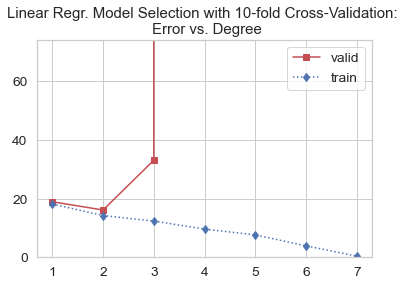

In [124]:
plot_train_and_valid_error_vs_degree(degree_list, cv_err_tr_list, cv_err_va_list)
plt.title('Linear Regr. Model Selection with 10-fold Cross-Validation: \n Error vs. Degree');
plt.savefig('figure2-err_vs_degree-cv-seed=%d.jpg' % SEED)

### Prediction 2: Score on the test set using the chosen model

Use the chosen hyperparameters, retrain ONE model on the FULL train+valid set.
Then make predictions on the heldout test set.

In [125]:
# TODO compute score on test set for later
# Again, it seems that the quadratic model wins because it minimizes the validation error and it 
# doesn't overfit the training data.

pipeline_chosen_model = cv_pipelines_list[1]
#tr_error_K_quadratic_model, valid_error_K_quadratic_model = train_models_and_calc_scores_for_n_fold_cv(pipeline_chosen_model, x_trva_LF, y_trva_L, K, SEED) # TODO

#err_tr_quadratic_model = np.mean(tr_error_K_quadratic_model) # TODO fixme, compute average error across all train folds
#err_va_quadratic_model = np.mean(valid_error_K_quadratic_model) # TODO fixme, compute average error across all heldout folds

#pipeline_chosen_model.fit(x_trva_LF, y_trva_L)

yhat_te_P_problem2 = pipeline_chosen_model.predict(x_te_PF)[:,0] # the shape of pipeline_chosen_model.predict(x_te_PF) is (100,1), and I only pick the first column, which is a 1D numpy array. otherwise the mse function will not return a single number.

err_te_problem2 = calc_mean_squared_error(y_te_P, yhat_te_P_problem2)
print(err_te_problem2)

15.435306718861503


In [126]:
print("Selected Parameters:")
#pretty_print_weights(pipeline_chosen_model)

feature_names = pipeline_chosen_model.named_steps['poly_transformer'].get_feature_names(['horsepower', 'weight', 'cylinders', 'displacement'])
for ff in range(len(feature_names)):
    #print(pipeline_chosen_model.named_steps['linear_regr'].coef_.shape)
    coef_val_ff = pipeline_chosen_model.named_steps['linear_regr'].coef_[0,ff]
    if np.allclose(coef_val_ff, 0):
        coef_str = "   0 exactly"
    else:
        #print(coef_val_ff)
        coef_str = "% 8.3f" % coef_val_ff
    print("Feature %5s: weight coef %s" % (feature_names[ff], coef_str))

print("10-fold CV estimate of heldout error:")
print(err_va_quadratic_model)
print("Error on the test-set:")
print(err_te_problem2)

Selected Parameters:
Feature horsepower: weight coef  -33.658
Feature weight: weight coef    1.186
Feature cylinders: weight coef  -11.992
Feature displacement: weight coef  -23.955
Feature horsepower^2: weight coef    1.159
Feature horsepower weight: weight coef  -28.228
Feature horsepower cylinders: weight coef   48.211
Feature horsepower displacement: weight coef   -3.815
Feature weight^2: weight coef  -32.987
Feature weight cylinders: weight coef   12.754
Feature weight displacement: weight coef   56.428
Feature cylinders^2: weight coef   25.002
Feature cylinders displacement: weight coef  -91.170
Feature displacement^2: weight coef   53.097
10-fold CV estimate of heldout error:


NameError: name 'err_va_quadratic_model' is not defined

# Problem 3: Cross Validation for Ridge Regression

In [127]:
alpha_grid = np.logspace(-6, 6, 13) # 10^-6, 10^-5, 10^-4, ... 10^-1, 10^0, 10^1, ... 10^6

degree_list = [1, 2, 3, 4, 5, 6, 7]

K = 10 # num folds
ridge_cv_err_tr_list = []
ridge_cv_err_va_list = []

ridge_param_list = list()

for degree in degree_list:
    for alpha in alpha_grid:
        ridge_param_list.append(dict(alpha=alpha, degree=degree))
        # TODO create a pipeline using features with current degree value
        pipeline = make_poly_ridge_regr_pipeline(degree, alpha)
        # TODO call your function to train a separate model for each fold and return train and valid errors
        # Don't forget to pass random_state = SEED (where SEED is defined above) so its reproducible
        tr_error_K, valid_error_K = train_models_and_calc_scores_for_n_fold_cv(pipeline, x_trva_LF, y_trva_L, K, SEED) # TODO
    
        err_tr = np.mean(tr_error_K) # TODO fixme, compute average error across all train folds
        err_va = np.mean(valid_error_K) # TODO fixme, compute average error across all heldout folds
        
        ridge_cv_err_tr_list.append(err_tr)
        ridge_cv_err_va_list.append(err_va)

### Figure 3: Error vs degree at alpha = 10^-3, alpha = 1, alpha = 1000

[18.89642045 16.09730004 23.46269994 31.48453786 28.91589495 28.72599255
 36.92372294]
[18.85281434 15.61867586 15.58793163 15.54025492 15.46350425 15.41123321
 15.37482465]
[58.93718444 50.55179362 44.04454195 40.09023572 37.96194378 36.8848092
 36.34363692]


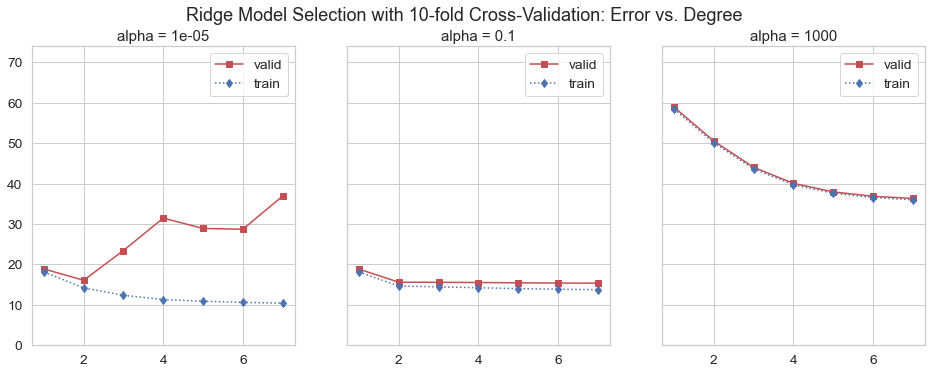

In [135]:
fig, ax_grid = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(16, 5.5))

for aa, alpha in enumerate([0.00001, 0.1, 1000.0]):
    # Find the elements of the param list that correspond to setting alpha to specific value
    match_ids = [pp for pp in range(len(ridge_param_list)) if np.allclose(alpha, ridge_param_list[pp]['alpha'])]
    train_err = np.asarray(ridge_cv_err_tr_list)[match_ids]
    test_err = np.asarray(ridge_cv_err_va_list)[match_ids]

    # Select which panel (of the 3 in figure) to be current active axis
    cur_ax = ax_grid[aa]
    plt.sca(cur_ax);
    
    # Set the title of the active axis
    cur_ax.set_title('alpha = %.5g' % alpha)

    # Draw line plot in active axis
    plot_train_and_valid_error_vs_degree(degree_list, train_err, test_err)
    print(test_err)

plt.suptitle('Ridge Model Selection with 10-fold Cross-Validation: Error vs. Degree');
plt.savefig('figure3-3_panels_by_alpha-err_vs_degree-seed=%d.pdf' % SEED, pad_inches=0, bbox_inches='tight')

### Prediction 3: Score on the test set using the chosen model


In [105]:
# I'll select the quadratic model with alpha = 0.1 since the test or validation error is lower for that model than for the other models.
# This model was competing with the quadratic model with alpha = 10^(-5), but the testing errors were 15.99099977 and 15.43920962 for the quadratic models with alpha = 10^(-5) and alpha = 0.1, respectively.

# retraining...
pipeline = make_poly_ridge_regr_pipeline(2, 0.1)
tr_error_K, valid_error_K = train_models_and_calc_scores_for_n_fold_cv(pipeline, x_trva_LF, y_trva_L, K, SEED)
err_tr = np.mean(tr_error_K)
err_va = np.mean(valid_error_K)
        

print("Selected Parameters (alpha and degree):")

feature_names = pipeline.named_steps['poly_transformer'].get_feature_names(['horsepower', 'weight', 'cylinders', 'displacement'])
for ff in range(len(feature_names)):
    print(pipeline_chosen_model.named_steps['linear_regr'].coef_.shape)
    coef_val_ff = pipeline.named_steps['ridge_regr'].coef_[0,ff]
    if np.allclose(coef_val_ff, 0):
        coef_str = "   0 exactly"
    else:
        #print(coef_val_ff)
        coef_str = "% 8.3f" % coef_val_ff
    print("Feature %5s: weight coef %s" % (feature_names[ff], coef_str))




print("10-fold CV estimate of heldout error:")
print(err_va)

print("Error on the test-set:")
#print(pipeline.predict(x_te_PF).shape)
yhat_te_P_problem3 = pipeline.predict(x_te_PF)[:,0] # the shape of pipeline_chosen_model.predict(x_te_PF) is (100,1), and I only pick the first column, which is a 1D numpy array. otherwise the mse function will not return a single number.

err_te_problem3 = calc_mean_squared_error(y_te_P, yhat_te_P_problem3)
print(err_te_problem3)

Selected Parameters (alpha and degree):
(1, 14)
Feature horsepower: weight coef  -27.604
(1, 14)
Feature weight: weight coef  -14.292
(1, 14)
Feature cylinders: weight coef   -2.688
(1, 14)
Feature displacement: weight coef  -19.925
(1, 14)
Feature horsepower^2: weight coef    2.154
(1, 14)
Feature horsepower weight: weight coef    0.627
(1, 14)
Feature horsepower cylinders: weight coef    9.808
(1, 14)
Feature horsepower displacement: weight coef   10.326
(1, 14)
Feature weight^2: weight coef   -2.812
(1, 14)
Feature weight cylinders: weight coef    4.391
(1, 14)
Feature weight displacement: weight coef    6.540
(1, 14)
Feature cylinders^2: weight coef    0.406
(1, 14)
Feature cylinders displacement: weight coef   -1.280
(1, 14)
Feature displacement^2: weight coef    7.069
10-fold CV estimate of heldout error:
15.439209618233424
Error on the test-set:
14.888304472180227
